In [1]:
import numpy as np
from matplotlib import pyplot as plt

from my_utils import *
from sigproc_kit import *

import DPO7354C as scope
scope.init("192.168.0.219")


*IDN?
TEKTRONIX,DPO7354C,C140419,CF:91.1CT FV:7.6.0 Build 7
successfully connected to Tektronix scope!


1

In [2]:
##################################################
##           configure Tek Scope                ##
##################################################


s = {
    "test"   :"CH2", 
    "ref"    :"CH1", 
}



acquire 1/1


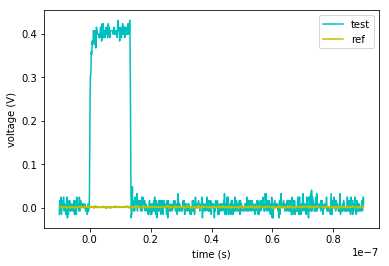

In [3]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = scope.capture_waveforms([
    s["test"],
    s["ref"],
  ],
    average=1
)

##################################################
##                     plot                     ##
##################################################


plt.plot(time, wfm[s["test"]], "c" ,label="test")
plt.plot(time, wfm[s["ref"]], "y" ,label="ref")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

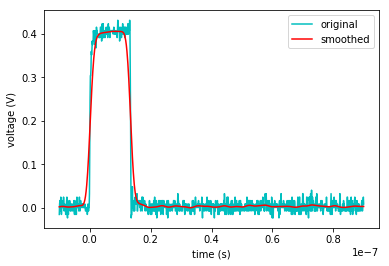

In [4]:
##################################################
##              gaussian smoothing              ##
##################################################

original = wfm[s["test"]]
smoothed = fft_gauss_LPF(time,original,sigma=1e-9,mu=0e-9)

#fft_convolve(time,[original,gauss(time,mu=0e-9,sigma=5e-9)])


plt.plot(time, original, "c" ,label="original")
plt.plot(time, smoothed, "r" ,label="smoothed")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

In [5]:
print(rise_time(time,original))
print(rise_time(time,smoothed))

1.2e-09
2.8e-09


In [12]:
const_frac_discriminator(time,smoothed,thresh=0.5)

(2.2855480000000001e-10, 1.33e-08)